<a href="https://colab.research.google.com/github/sagasameh/sagasameh/blob/main/Copy_of_ImageProcessingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
belalsafy_egyptian_new_currency_2023_path = kagglehub.dataset_download('belalsafy/egyptian-new-currency-2023')

print('Data source import complete.')
import kagglehub

dataset_path = kagglehub.dataset_download("belalsafy/egyptian-new-currency-2023")
print("✅ Data source import complete.")
print("📂 Dataset path:", dataset_path)
from google.colab import drive
drive.mount('/content/drive')




Using Colab cache for faster access to the 'egyptian-new-currency-2023' dataset.
Data source import complete.


100%|██████████| 395M/395M [00:20<00:00, 20.3MB/s]

Extracting files...


✅ Data source import complete.
📂 Dataset path: /root/.cache/kagglehub/datasets/belalsafy/egyptian-new-currency-2023/versions/1
Mounted at /content/drive


In [2]:
# ===============================
# All Imports for the Project
# ===============================

# System & Utilities
import os
import random
import warnings
warnings.filterwarnings("ignore")

# Numerical & Data Handling
import numpy as np
import pandas as pd

# Image Processing
import cv2
from PIL import Image

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Split & Balancing
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Evaluation Metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score
)

# TensorFlow / Keras Core
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, callbacks

# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CNN Layers (explicit)
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Dense,
    Flatten,
    Dropout,
    BatchNormalization,
    GlobalAveragePooling2D,
    Input
)

# Transfer Learning Models
from tensorflow.keras.applications import (
    EfficientNetB0,
    ResNet50,
    MobileNetV2
)
from tensorflow.keras.applications.efficientnet import preprocess_input

# Model Save / Load
from tensorflow.keras.models import load_model



In [3]:
IMG_SIZE = 224
X = []
y = []

# تحديد المجلد الأساسي
main_dir = os.path.join(dataset_path, os.listdir(dataset_path)[0])
class_names = sorted(os.listdir(main_dir))
print("Classes:", class_names)

# قراءة الصور
for label, folder in enumerate(class_names):
    folder_path = os.path.join(main_dir, folder)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0
            X.append(img)
            y.append(label)
        except:
            pass

X = np.array(X)
y = np.array(y)
print("Images shape:", X.shape)
print("Labels shape:", y.shape)


Classes: ['test', 'train', 'valid']
Images shape: (0,)
Labels shape: (0,)


In [4]:
import os

# اطبعي كل المسارات
print("Root dataset path:", dataset_path)
print("Root content:", os.listdir(dataset_path))
for folder in os.listdir(dataset_path):
    print(folder, "->", os.listdir(os.path.join(dataset_path, folder)))



Root dataset path: /root/.cache/kagglehub/datasets/belalsafy/egyptian-new-currency-2023/versions/1
Root content: ['dataset']
dataset -> ['train', 'valid', 'test']


In [5]:
train_dir = "/kaggle/input/egyptian-new-currency-2023/dataset/train"
class_names = sorted(os.listdir(train_dir))
print("Classes:", class_names)


Classes: ['1', '10', '10 (new)', '100', '20', '20 (new)', '200', '5', '50']


In [6]:

IMG_SIZE = 224
X_train = []
y_train = []

for label, folder in enumerate(class_names):
    folder_path = os.path.join(train_dir, folder)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0
            X_train.append(img)
            y_train.append(label)
        except:
            pass

X_train = np.array(X_train)
y_train = np.array(y_train)
print("Train Images shape:", X_train.shape)
print("Train Labels shape:", y_train.shape)



Train Images shape: (2637, 224, 224, 3)
Train Labels shape: (2637,)


In [7]:
def load_images_from_folder(folder_path):
    X = []
    y = []
    for label, folder in enumerate(sorted(os.listdir(folder_path))):
        class_path = os.path.join(folder_path, folder)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = img / 255.0
                X.append(img)
                y.append(label)
            except:
                pass
    return np.array(X), np.array(y)

valid_dir = "/kaggle/input/egyptian-new-currency-2023/dataset/valid"
test_dir  = "/kaggle/input/egyptian-new-currency-2023/dataset/test"

X_val, y_val = load_images_from_folder(valid_dir)
X_test, y_test = load_images_from_folder(test_dir)

print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Validation: (760, 224, 224, 3) (760,)
Test: (290, 224, 224, 3) (290,)


1 : 60 images
10 : 315 images
10 (new) : 317 images
100 : 315 images
20 : 322 images
20 (new) : 346 images
200 : 313 images
5 : 334 images
50 : 315 images


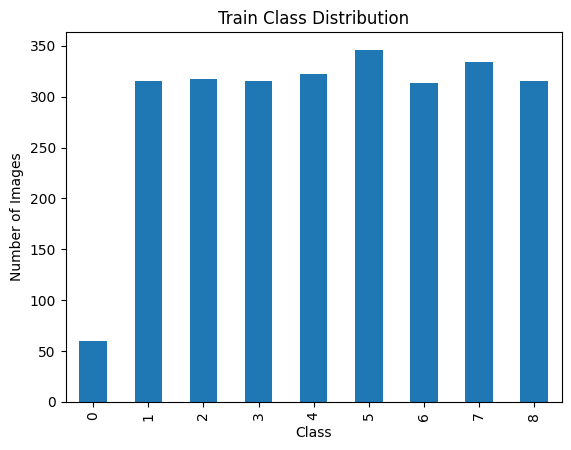

1 : 20 images
10 : 80 images
10 (new) : 130 images
100 : 80 images
20 : 80 images
20 (new) : 130 images
200 : 80 images
5 : 80 images
50 : 80 images


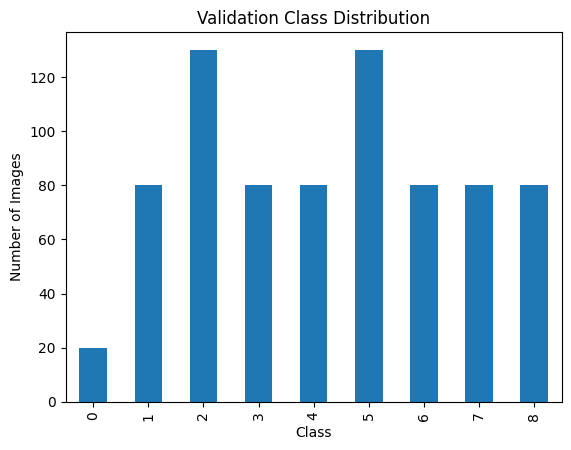

1 : 20 images
10 : 35 images
10 (new) : 30 images
100 : 35 images
20 : 35 images
20 (new) : 30 images
200 : 35 images
5 : 35 images
50 : 35 images


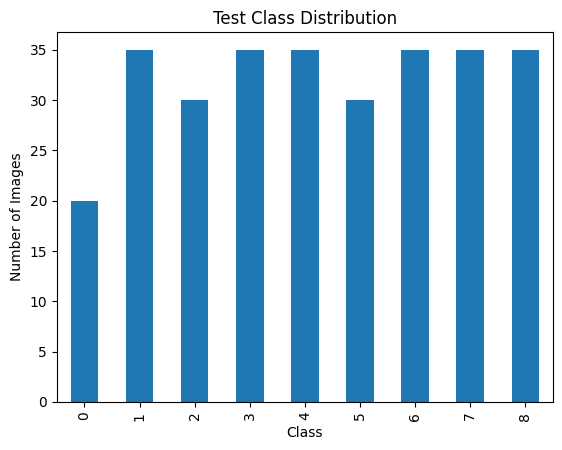

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def check_balance(y, class_names, title):
    df = pd.DataFrame(y, columns=["label"])
    counts = df["label"].value_counts().sort_index()
    for i, count in counts.items():
        print(f"{class_names[i]} : {count} images")
    counts.plot(kind="bar")
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.show()

check_balance(y_train, class_names, "Train Class Distribution")
check_balance(y_val, class_names, "Validation Class Distribution")
check_balance(y_test, class_names, "Test Class Distribution")


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation للـ Train
train_datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# للـ Validation و Test نستخدم Normalization فقط
val_datagen = ImageDataGenerator()


In [10]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)


Class weights: {0: np.float64(4.883333333333334), 1: np.float64(0.9301587301587302), 2: np.float64(0.9242902208201893), 3: np.float64(0.9301587301587302), 4: np.float64(0.9099378881987578), 5: np.float64(0.846820809248555), 6: np.float64(0.9361022364217252), 7: np.float64(0.8772455089820359), 8: np.float64(0.9301587301587302)}


In [11]:
batch_size = 64
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=batch_size
)

val_generator = val_datagen.flow(
    X_val, y_val,
    batch_size=batch_size
)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Conv layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    # Conv layer 2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Conv layer 3
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Flatten before Dense layers
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    # Output layer
    Dense(len(class_names), activation='softmax')
])


In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,121 (42.61 MB)

 Trainable params: 11,170,121 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
epochs = 200
batch_size = 64

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    class_weight=class_weights
)


Epoch 1/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 954ms/step - accuracy: 0.1005 - loss: 3.7749 - val_accuracy: 0.1513 - val_loss: 2.1109
Epoch 2/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 738ms/step - accuracy: 0.1031 - loss: 2.1364 - val_accuracy: 0.1724 - val_loss: 2.0733
Epoch 3/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 33s 776ms/step - accuracy: 0.1715 - loss: 1.9838 - val_accuracy: 0.1724 - val_loss: 2.0478
Epoch 4/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 32s 747ms/step - accuracy: 0.1728 - loss: 1.9058 - val_accuracy: 0.2000 - val_loss: 1.9665
Epoch 5/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 32s 753ms/step - accuracy: 0.1971 - loss: 1.8394 - val_accuracy: 0.1829 - val_loss: 2.0419
Epoch 6/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 33s 788ms/step - accuracy: 0.2165 - loss: 1.9043 - val_accuracy: 0.2921 - val_loss: 1.8933
Epoch 7/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 746ms/step - accuracy: 0.2793 - loss: 1.7523 - val_accuracy: 0.3276 - val_loss: 1.8502
Epoch 8/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 746ms/step - accuracy: 0.3103 - loss: 1.7058 - 

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,                # مسار test
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False            # مهم علشان confusion matrix
)



Found 290 images belonging to 9 classes.


In [18]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 586ms/step - accuracy: 0.8883 - loss: 0.5480
Test Accuracy: 0.8724138140678406


In [19]:
import numpy as np

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 519ms/step


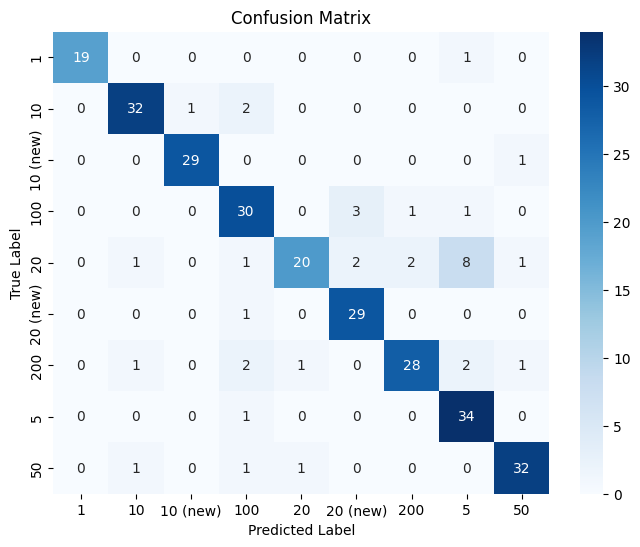

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [21]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred_classes,
    target_names=class_names
))


              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
          10       0.91      0.91      0.91        35
    10 (new)       0.97      0.97      0.97        30
         100       0.79      0.86      0.82        35
          20       0.91      0.57      0.70        35
    20 (new)       0.85      0.97      0.91        30
         200       0.90      0.80      0.85        35
           5       0.74      0.97      0.84        35
          50       0.91      0.91      0.91        35

    accuracy                           0.87       290
   macro avg       0.89      0.88      0.88       290
weighted avg       0.88      0.87      0.87       290



In [22]:
for i, class_name in enumerate(class_names):
    idx = np.where(y_true == i)
    acc = np.mean(y_pred_classes[idx] == y_true[idx])
    print(f"{class_name} accuracy: {acc:.2f}")


1 accuracy: 0.95
10 accuracy: 0.91
10 (new) accuracy: 0.97
100 accuracy: 0.86
20 accuracy: 0.57
20 (new) accuracy: 0.97
200 accuracy: 0.80
5 accuracy: 0.97
50 accuracy: 0.91


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',   # بيراقب دقة الـ validation
    patience=5,               # يستنى 5 epochs بدون تحسن
    restore_best_weights=True
)


In [24]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=1,
    callbacks=[early_stop]
)


42/42 ━━━━━━━━━━━━━━━━━━━━ 37s 810ms/step - accuracy: 0.9405 - loss: 0.1807 - val_accuracy: 0.9184 - val_loss: 0.3193


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


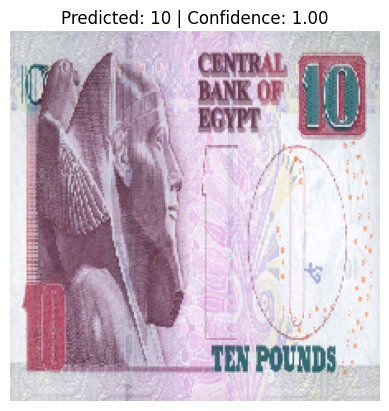

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


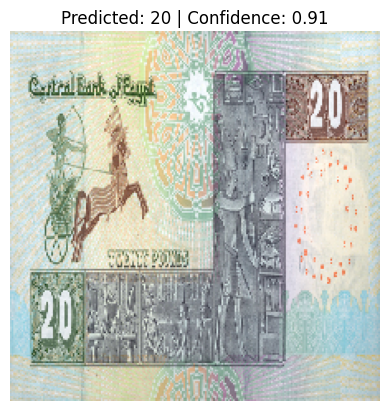

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


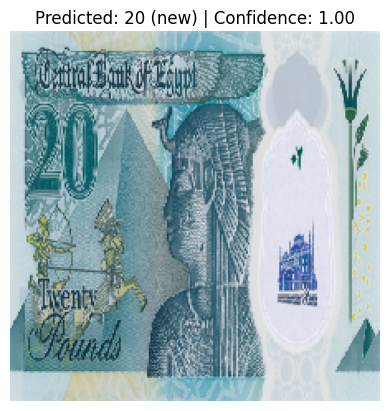

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


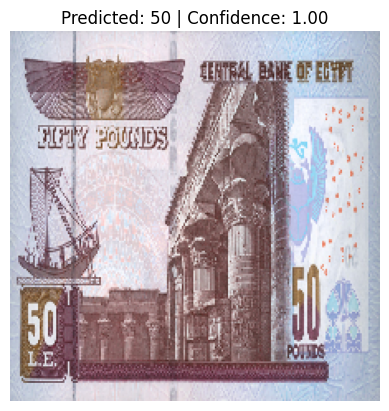

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


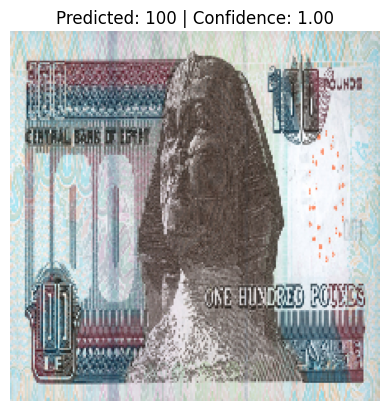

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


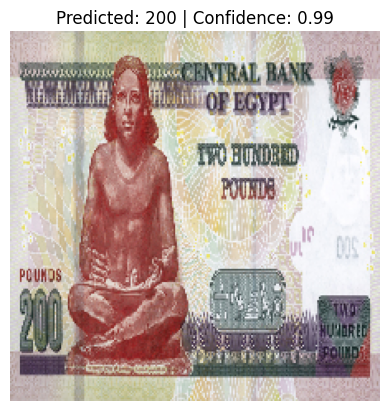

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


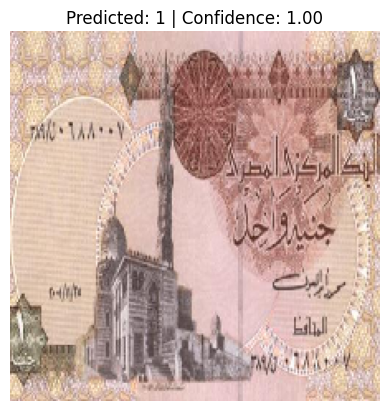

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


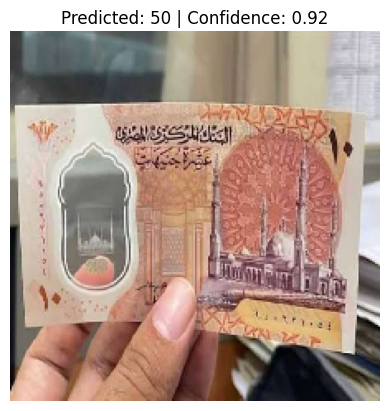

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# مسار المجلد
demo_dir = "/content/drive/MyDrive/Egyptian currency photos"

# نجيب كل الصور في المجلد
image_files = [f for f in os.listdir(demo_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

for img_name in image_files:
    img_path = os.path.join(demo_dir, img_name)

    # تجهيز الصورة للموديل
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    img_array_exp = np.expand_dims(img_array, axis=0)

    # Prediction
    prediction = model.predict(img_array_exp)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # عرض الصورة مع prediction
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} | Confidence: {confidence:.2f}")
    plt.show()
